This exercise consists in analyzing a dataset containg timing information from a series of Time-to-Digital-Converters (TDC) implemented in a pair of FPGAs. Each measurement (i.e. each row of the input file) consists of a flag that specifies the type of message ('HEAD', which in this case is always 1), two addresses of the TDC providing the signal ('FPGA' and 'TDC_CHANNEL'), and the timing information ('ORBIT_CNT', 'BX_COUNTER', and 'TDC_MEAS'). Each TDC count corresponds to 25/30 ns, whereas a unit of BX_COUNTER corresponds to 25 ns, and the ORBIT_CNT is increased every 'x' BX_COUNTER. This allows to store the time in a similar way to hours, minutes and seconds.

In [8]:
# If haven't downloaded it yet, please get the data file with wget
#!wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ./data/

1\. Create a Pandas DataFrame reading N rows of the `data/data_000637.txt` dataset. Choose N to be smaller than or equal to the maximum number of rows and larger that 10k (check the documentation).

In [1]:
import pandas as pd
pd.set_option('display.max_rows', 100)
df = pd.read_csv("./data/file.txt")
print(df)

         HEAD  FPGA  TDC_CHANNEL   ORBIT_CNT  BX_COUNTER  TDC_MEAS
0           1     0          123  3869200167        2374        26
1           1     0          124  3869200167        2374        27
2           1     0           63  3869200167        2553        28
3           1     0           64  3869200167        2558        19
4           1     0           64  3869200167        2760        25
...       ...   ...          ...         ...         ...       ...
1310715     1     0           62  3869211171         762        14
1310716     1     1            4  3869211171         763        11
1310717     1     0           64  3869211171         764         0
1310718     1     0          139  3869211171         769         0
1310719     1     0           61  3869211171         762        18

[1310720 rows x 6 columns]


2\. Estimate the number of BX in a ORBIT (the value 'x').

In [4]:
x = df.BX_COUNTER.max()
print(f"The estimated number of BX = {x+1}")

The estimated number of BX = 3564


3\. Find out the duration of the data taking in hours, minutes and seconds. You can either make an estimate based on the fraction of the measurements (rows) you read, or perform this check precisely by reading the whole dataset.

In [13]:
import datetime
import math

df['time'] = df['ORBIT_CNT']*x*25+df['BX_COUNTER']*25+df['TDC_MEAS']*(25/30) # time in ns
duration = (df['time'].iloc[-1] - df['time'].iloc[0])*10**(-9) #time in s
print(f"Duration of the data : {datetime.timedelta(seconds=duration)}")
print(f"Duration of the first row : {datetime.timedelta(seconds=(df['time'].iloc[0])*10**(-9))}")

Duration of the data : 0:00:00.980141
Duration of the first row : 3 days, 23:44:09.004935


4\. Create a new column with the absolute time in ns (as a combination of the other three columns with timing information) since the beginning of the data acquisition.

In [14]:
#time column :
df['time'] = df ['time'] - df['time'].iloc[0]
print(df)

         HEAD  FPGA  TDC_CHANNEL   ORBIT_CNT  BX_COUNTER  TDC_MEAS  \
0           1     0          123  3869200167        2374        26   
1           1     0          124  3869200167        2374        27   
2           1     0           63  3869200167        2553        28   
3           1     0           64  3869200167        2558        19   
4           1     0           64  3869200167        2760        25   
...       ...   ...          ...         ...         ...       ...   
1310715     1     0           62  3869211171         762        14   
1310716     1     1            4  3869211171         763        11   
1310717     1     0           64  3869211171         764         0   
1310718     1     0          139  3869211171         769         0   
1310719     1     0           61  3869211171         762        18   

                 time  
0        0.000000e+00  
1        8.125000e-01  
2        4.476625e+03  
3        4.594125e+03  
4        9.649125e+03  
...            

5\. Use the `.groupby()` method to find out the noisy channels, i.e. the TDC channels with most counts (print to screen the top 3 and the corresponding counts)

In [29]:
nois_channels = df.groupby(["TDC_CHANNEL"]).TDC_CHANNEL.count()
print(f"The TDC channels with most count {nois_channels.nlargest(3)}")

The TDC channels with most count TDC_CHANNEL
139    108059
64      66020
63      64642
Name: TDC_CHANNEL, dtype: int64


6\. Count the number of non-empty orbits (i.e. the number of orbits with at least one hit). Count also the number of unique orbits with at least one measurement from TDC_CHANNEL=139.

In [20]:
nbr_orbits = len(df["ORBIT_CNT"].unique()) 
nbr_empty_orbits = abs(nbr_orbits- (df["ORBIT_CNT"].max()-df["ORBIT_CNT"].min()))
print(f"number of orbits : {nbr_orbits}")
print(f"number of non empty orbits : {nbr_orbits-nbr_empty_orbits} empty orbits")

number of orbits : 11001
number of non empty orbits : 10998 empty orbits


In [26]:
df_unique = df.drop_duplicates(subset='ORBIT_CNT')
nbrs = len(df_unique.loc[df_uninque['TDC_CHANNEL'] == 139]) #loc access group of col and row, count the # of val
print(f"number of unique orbits from TDC_CHANNEL = 139 : {nbrs}")

number of unique orbits from TDC_CHANNEL = 139 : 203


7\. **Optional:** Make two occupancy plots (one for each FPGA), i.e. plot the number of counts per TDC channel

array([[<AxesSubplot:title={'center':'TDC_CHANNEL'}>]], dtype=object)

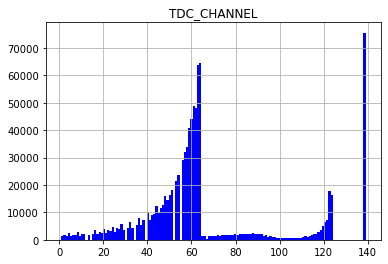

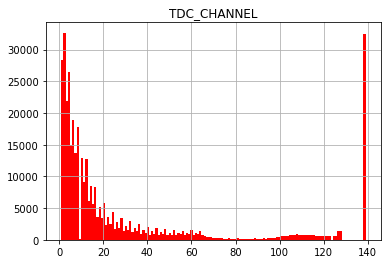

In [31]:
df_fpga0 = df.loc[df['FPGA'] == 0]
df_fpga1 = df.loc[df['FPGA'] == 1]

df_fpga0.hist(column='TDC_CHANNEL', bins= df['TDC_CHANNEL'].max(), color = 'blue')
df_fpga1.hist(column='TDC_CHANNEL', bins= df['TDC_CHANNEL'].max(), color="red")
